### Summary

In progress...

### Loading packages and data

In [1]:
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

In [3]:
# Download data from google drive (Respect Eng / Wiki Collab): wikipdia data/v2_annotated
dat = pd.read_csv('../data/exp2_annotated_1k_no_admin_blocked_user_post_sample.csv')

In [4]:
# Remove test questions
dat = dat[dat['_golden'] == False]

In [5]:
# Replace missing data with 'False'
dat = dat.replace(np.nan, False, regex=True)

In [6]:
dat.columns

Index([u'_unit_id', u'_created_at', u'_golden', u'_id', u'_missed', u'_started_at', u'_tainted', u'_channel', u'_trust', u'_worker_id', u'_country', u'_region', u'_city', u'_ip', u'how_aggressive_or_friendly_is_the_tone_of_this_comment', u'is_harassment_or_attack', u'na', u'clean_diff', u'diff', u'how_aggressive_or_friendly_is_the_tone_of_this_comment_gold', u'insert_only', u'is_harassment_or_attack_gold', u'na_gold', u'nil', u'page_id', u'page_title', u'rev_comment', u'rev_id', u'rev_timestamp', u'user_id', u'user_text'], dtype='object')

In [7]:
print set(dat['how_aggressive_or_friendly_is_the_tone_of_this_comment'])

set([False, '+++ Very Friendly', '--', '-', '+', '--- Very Aggressive (including passive aggression)', '++', 'Neutral'])


In [8]:
#Translate the values from 
#how_aggressive_or_friendly_is_the_tone_of_this_comment into numbers
def translate_how_aggressive_to_num(score):
    str_to_num = {'+++ Very Friendly': 3,
                  '++': 2,
                  '+': 1,
                  'Neutral': 0,
                  '-': -1,
                  '--': -2,
                  '--- Very Aggressive (including passive aggression)': -3}
    if score:
        return str_to_num[score]
    else:
        return np.nan

In [9]:
dat['how_aggressive_or_friendly_is_the_tone_of_this_comment_num'] = dat['how_aggressive_or_friendly_is_the_tone_of_this_comment'].apply(translate_how_aggressive_to_num)

In [10]:
#Count as occurs - write this as a function
def create_column_of_counts(df, col):
    return df.apply(lambda x: col in str(x))

In [11]:
columns = ['not_attack', 'other', 'quoting', 'recipient', 'third_party']

In [12]:
for col in columns:
    dat[col] = create_column_of_counts(dat['is_harassment_or_attack'], col)

In [45]:
# Group the data
grouped_dat = dat.groupby(['rev_id'], as_index=False).agg({'clean_diff': 'first',
            'how_aggressive_or_friendly_is_the_tone_of_this_comment_num': 'mean', 
            'not_attack': 'mean',
            'other': 'mean',
            'quoting': 'mean',
            'recipient': 'mean',
            'third_party': 'mean',
            'na': 'mean'})

In [46]:
# Get rid of data which the majority thinks is not in English or not readable
grouped_dat = grouped_dat[grouped_dat['na'] < 0.5]

In [47]:
grouped_dat

,rev_id,third_party,how_aggressive_or_friendly_is_the_tone_of_this_comment_num,na,not_attack,clean_diff,quoting,recipient,other
0,174946368,0.000000,0.000000,0.000,0.857143,]\n\nFine you testing the waters again despite past history and TMers failure to comply with COI. When you actually try and make the article neutral and controvert the fringe theories is when I anticipate the problem. I too tried to assume good faith at first despite past history. We shall see.,0.000000,0.142857,0.000000
1,178007125,0.000000,0.000000,0.000,1.000000,"Yogi\nCivility states: ""...Our Wikipedia community has by experience developed an informal hierarchy of core principles —the most important being that articles be written with a neutral point of view. After that we request a reasonable degree of civility towards others..."" Note that the comments I made were factual and in response to a single purpose, anon advocacy editor's POV assertion that Maharishi deserves ""...great deal of respect for what he has done and is still doing 24/7 since 1955 - to bring the peace of the Himalayas to all mankind"". MMY's claims and TM's belief (see Yogic_flying) in a ""Maharishi Effect"" producing peace and harmony in surrounding areas and attempts to produce a cadre of yogic flyers (""...Proponents of Yogic Flying claim that world peace and many other social and environmental benefits can be generated by having at least seven thousand yogic flyers around the world hopping at the same time..."") has not produced increased world peace and harmony or yogic ...",0.000000,0.000000,0.000000
2,179522938,0.000000,0.125000,0.000,1.000000,You take strong stands and apparently you get this kind of treatment. Hang in there!,0.000000,0.000000,0.000000
3,179538376,0.142857,0.142857,0.000,0.857143,"2007 (UTC)\n\nAppreciate your catching forum link, missed that. Editor favoring Gangaji insists on even rewriting or deleting other editors comments on the talk page and repeat edit warring and information suppression to enforce personal interpretation of BLP. Next RV will result in their 3RR violation. Please intervene. 05:22, 22 December",0.000000,0.000000,0.000000
4,179539208,0.000000,-0.714286,0.000,0.428571,"Your next reversion will be a 3RR violation and I've reported this. Additionally, your changing or removal of other editor's comments is evident misconduct and will be reported as well. If you do not choose dispute resolution rather than edit warring and misconduct, given the repeated warnings, I expect other editors will take action this time.",0.000000,0.571429,0.000000
5,180751876,0.285714,-0.428571,0.000,0.428571,"IMO, Wikipedia has become a playground for dedicated fringers to push psuedoscientific and fringe nonsense such as ""Bleep"", among many other subjects, that would never probably not even worth an article in a conventional encyclopedia, nor would the obvious COI, POVing and misapplication of science be tolerated. The primary weakness of Wikipedia has been demonstrated all too well, that it assumes that an article is mainly based on a signficant number of neutral, academic sources and that neutral editors hold the balance in in RFCs and consensus, which is often only the case for more well established subjects. Accuracy comparisons with Britanica, for example, do not accurately present that there is no comparison for the multitude of fring articles no other encylopedia encourages. Fringe topics and claims simply draw dedicated fringe editing support while balanced editors simply don't put the same amount of effort into pointing out the subject is fringe and refuting the nonsense as fr...",0.000000,0.000000,0.285714
6,182890075,0.000000,0.428571,0.000,1.000000,Agreed. You might also try a Request for Comment (RFC) to draw in more editors.,0.000000,0.000000,0.000000
7,259319069,0.000000,0.142857,0.000,1.000000,"Hi David. You seem to misunderstand my point. Finally, many weeks after, the Lake County newspaper writes an obituary, at . It clearly states that he wa

### Plot histogram of average ratings by comment

For each revision, we take the average of all the ratings by level of friendliness/aggressiveness. The histogram of these averages is displayed below.

In [48]:
def hist_comments(df, bins, plot_by, title):
    plt.figure()
    sliced_array = df[[plot_by]]
    weights = np.ones_like(sliced_array)/len(sliced_array)
    sliced_array.plot.hist(bins = bins, legend = False, title = title, weights=weights)
    plt.ylabel('Proportion')
    plt.xlabel('Average Score')

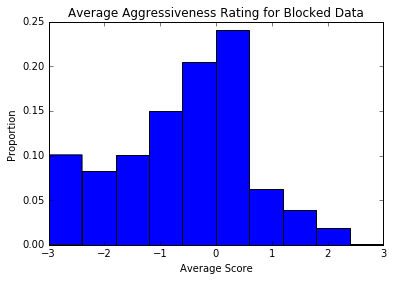

In [49]:
bins = np.linspace(-3,3,11)
hist_comments(grouped_dat, bins, 'how_aggressive_or_friendly_is_the_tone_of_this_comment_num', 'Average Aggressiveness Rating for Blocked Data')

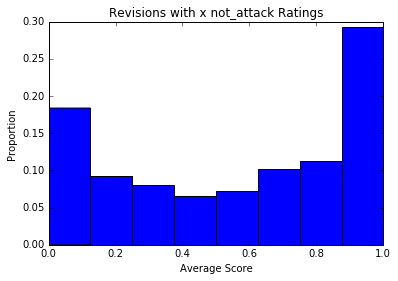

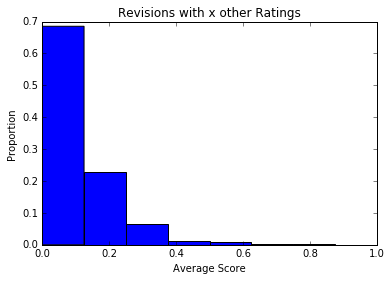

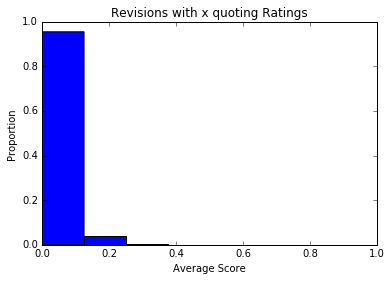

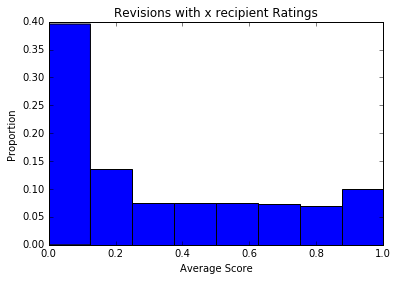

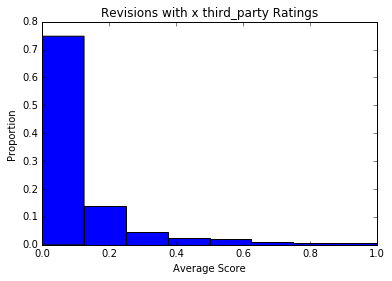

In [51]:
bins = np.linspace(0,1,9)
for col in columns:
    hist_comments(grouped_dat, bins, col, 'Revisions with x %s Ratings' % col)

### Selected harassing and aggressive comments by quartile

In [52]:
# Need to ensure num < 100. Should add check.
def sorted_comments(df, sort_by, quartile, num, is_ascending = True):
    n = df.shape[0]
    if quartile == 1:
        quartile = 0.99
    start_index = int(quartile*n)
    return df[['clean_diff', 'how_aggressive_or_friendly_is_the_tone_of_this_comment_num',
              'not_attack', 'other', 'quoting', 'recipient', 'third_party']].sort_values(
        by=sort_by, ascending = is_ascending)[start_index:start_index + num]

Most aggressive comments

In [53]:
sorted_comments(grouped_dat, 'how_aggressive_or_friendly_is_the_tone_of_this_comment_num', 0, 5)

,clean_diff,how_aggressive_or_friendly_is_the_tone_of_this_comment_num,not_attack,other,quoting,recipient,third_party
492,Fucking left-wing bastard \n\nYou left-wing liberalist bastards are enemies of a free and righteous world and ought to be banned!,-3,0,0.142857,0,1.000000,0.000000
737,Hum! \n\nFuck you! You are a person worse than pigs or dogs!,-3,0,0.000000,0,1.000000,0.000000
520,Renzoy16 ! Shut The Fuck Up,-3,0,0.000000,0,0.857143,0.142857
818,su:)ck my ba:)lls you fa:)g:)got \n\nloser,-3,0,0.142857,0,0.857143,0.000000
681,You fascit Nazi! You socialist bastard! You filthy Hippy! \n\nYou dare touch my edits again and I'll go to where you live and kick your ass in person. It shouldn't be hard to find. Communes smell worse than slaughter houses. I make edits. I don't vandilaze. Get off your high horse.,-3,0,0.000000,0,1.000000,0.000000


Median aggressive comments

In [54]:
sorted_comments(grouped_dat, 'how_aggressive_or_friendly_is_the_tone_of_this_comment_num', 0.5, 5)

,clean_diff,how_aggressive_or_friendly_is_the_tone_of_this_comment_num,not_attack,other,quoting,recipient,third_party
570,"In that case, I'll revert to the comments I made before I noticed he was blocked. The Dissident Aggressor",-0.428571,0.714286,0.285714,0,0.000000,0.142857
957,"Warning \n\nInstead of warning me, can you look a little closer at what went on?\n\nI spent a consider time improving an article. He and two other authors came about and replaced a 99% EXACT duplicate of content which actuall remained in topic,\n\nAll I had done was paragraphize it.\n\nOf course, I removed it.\n\nYou can see it here under the section 'History' as plain as day.\n\nHe then attacked me claiming I was edit warring. \n\n Where is the sense in that?\n What is the benefit in duplicating content?\n How did it improve the article or encourage involvement?\n\nTherefore I asked him to remove and erase the bad mark so it is not used again me but he refuses, and now runs to you.\n\nDo you think this is correct, or do you think you are just being manipulated?\n\nAgain, I ask you, what is the benefit to the Wikipedia or its readers to have duplicate and badly composed content?\n\nThank you.",-0.428571,0.428571,0.000000,0,0.571429,0.142857
567,The Dissident Aggressor,-0.428571,0.428571,0.142857,0,0.000000,0.428571
117,"""This is because it means reading walls of text and endless discussion. It is tantamount to a strategy and unfair advantage."" - he used exactly that tactic himself; so many times on boards, talkpages, and on the article talkpage; and drowned his own RfC about a merge re his similarly-biased/clueless Indo-Canadian titles. A lot of those ""55,956 words"" were his, all being obstinate and obstructive and working hard to reject sources or facts not to his liking/bias. And that tactic is described in certain passage of WP:POV fork.\n\nthe grossly overpadded Vancouver section that he is now POV forking is full of junk/trivia and off-topic content and UNDUE, he was only adding content IMO to try to justify the split; I've found tons of repetitions, loads of bad writing, abuse of sources and SYNTH and more. And you say ""be concise"" - when there's so much wrong all at once and I try to lay it out and show what's wrong with it, it's ""too long to read"". So, apparently, is the NPOV policy an...",-0.428571,0.571429,0.142857,0,0.142857,0.285714
595,"didn't try to explain his ""refugee crisis"" edit on the talk page after multiple undo's. Only later came up with a source that substantiates nothing. The IP 37.76.11.111 was me (I did not care to log in for a mere undo) but not 37.76.42.195. It's not only me in Hungary interested in AND AFFECTED DIRECTLY by this crisis who think in the same way about it. Furthermore i would like to COMPLAIN ABOUT THE CLEAR BIAS of towards The New York Times bordering on BRAND BUILDING: not cites almost EXCLUSIVELY The NYT, but insist on MENTIONING IT BY NAME in the lead section of the article.",-0.428571,0.714286,0.142857,0,0.142857,0.000000


Least aggressive comments

In [55]:
sorted_comments(grouped_dat, 'how_aggressive_or_friendly_is_the_tone_of_this_comment_num', 0, 5, False)

,clean_diff,how_aggressive_or_friendly_is_the_tone_of_this_comment_num,not_attack,other,quoting,recipient,third_party
852,"Thank you so much! Many blessings for you, and your family the Christmas season!",2.857143,1,0,0,0,0
39,"Such a friendly, helpful and encouraging person (82.132.222.241 )",2.285714,1,0,0,0,0
340,"Thanks so much for your help and advice! Cheers! 02:31, 28 May 2015 (UTC)",2.285714,1,0,0,0,0
298,"Merci Beaucoup \n\nA very kind thank you, Geraldine.",2.285714,1,0,0,0,0
432,Hello Machan! \n\n My Pleasure It's my pleasure to corporate with you ion your modest work in safeguarding the Sinhalese culture and ethics. Talk to me anytime. Summon,2.142857,1,0,0,0,0


### Work in progress

In [ ]:
## Slices on joins

In [58]:
sorted_comments(grouped_dat[grouped_dat['not_attack'] > 0.5], 'how_aggressive_or_friendly_is_the_tone_of_this_comment_num', 0, 10)

,clean_diff,how_aggressive_or_friendly_is_the_tone_of_this_comment_num,not_attack,other,quoting,recipient,third_party
562,because I'm gay and love to suck cock,-1.500000,0.625000,0.375000,0,0.000000,0.000000
326,"I'M REALLY FUCKING SCARED 86.131.154.229 22:41, 26 May 2015 (UTC)",-1.428571,0.571429,0.285714,0,0.142857,0.000000
489,"Oh, sure! That old chestnut… Ah, and to think I was about to ask if you had that idiom in Yankland—you own it!\nNow, listen up, American worm: I have 614 pages on my watchlist so far. I'd also ask you to keep in mind that I have incredible power.\nAlso, please, do not misunderstand my keeping out that edit on Juan Cole. It honestly was just that Mediaite (sp?) cannot be considered RS, as well you knew. I am not interested in defending that maggot—""Let's invade Libya! It will be totally cool!""—because Cole pronounces himself a person of the Left. If you want to fire reams of criticism into his article, be my guest. Truth told, there is already some embarrassingly precarious synth criticism of him inserted by me. I ought to snip it out, but I just can't find the time, you know?\nContinuing with Cole: I do think the bit about the ""far right-wing Jews"" is just the usual attempt at smear with antisemitism (he's a critic of Israel, as you know). He, of course, knew this would happen, whi...",-1.142857,0.571429,0.142857,0,0.428571,0.000000
541,"=The edit goons are at it again\n\nPresumably no one else here gets ""citation needed"" tags in their user page, since it is a user page, rather than an encyclopedic article, a distinction an overzealous seems to have failed to grasp. I'd love to see an example of another editor who had their personal user page subjected to such pointless scrutiny. You know, so I can continue to ""assume good faith"" rather than conclude than I've been unfairly targeted and treated once again.",-1.142857,0.571429,0.000000,0,0.000000,0.428571
34,"If you leave me a message here, I will ignore it and delete it. I do not care what you have to say.",-1.142857,0.571429,0.000000,0,0.428571,0.000000
264,"MAK \n\nDo you have some special knowledge of Austrian Copyright law, or of the details of my recent edits, which makes you think that your actions in reverting substantial improvements to wikipedia was a good idea? \n\nBasically, which specific sort of person are you who thinks reverting changes from a position of massive ignorance is a good idea?",-1.142857,0.571429,0.000000,0,0.428571,0.000000
522,Then why did you ask how abusive the outcome was? The Dissident Aggressor,-1.000000,0.571429,0.142857,0,0.285714,0.000000
127,"Re K re ""dubious"" per CANENGL\nIt's hard to believe he's even Canadian at times...he may not be in fact, just as WTM may not be in Texas IMO; K railed against Canadian English norms and Canadian English and sources as ""parochial"" in teh native endonym RMs and related NCL and NCET disputes, and was among those who claimed that ""global usages"" (US/UK) outweighed Canadian usages and sources...that bit of chauvinism was turned on its head when it was easily proven that sources by and large were Canadian (in the case of the town no-dabs ""war"" it's a given that there'd be more Canadian sources on e.g. Chemainus or Lillooet or Atlin - than there woudl ever be in the whole rest of the world put together.\n\nCanadian English is a recognizable norm; I live in Cambodia right now - there's actually more Canadians per capita here than in Thailand, as I've found out - and the different accent, and different lexicon are obvious....to the Americans and Europeans as much as to the Canadians.\n\nCo...",-1.000000,0.571429,0.000000,0,0.285714,0.142857
806,And \n\ntell that liz creep that how can a horror story be a personal story!?!?!?,-1.000000,0.571429,0.000000,0,0.142857,0.428571
700,ANTI SEMITISM AT WIKIPEDIA \n\nCome chat with my friends on Facebook \n\n,-0.875000,0.750000,0.000000,0,0.000000,0.250000
